In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('ADANIPORTS.csv')

In [21]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [22]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [4]:
df2=df.reset_index()['Turnover']

In [20]:
df2.shape

(3322, 1)

In [24]:
df2

array([[0.32931759],
       [0.05281808],
       [0.05573317],
       ...,
       [0.10264612],
       [0.12779432],
       [0.11475047]])

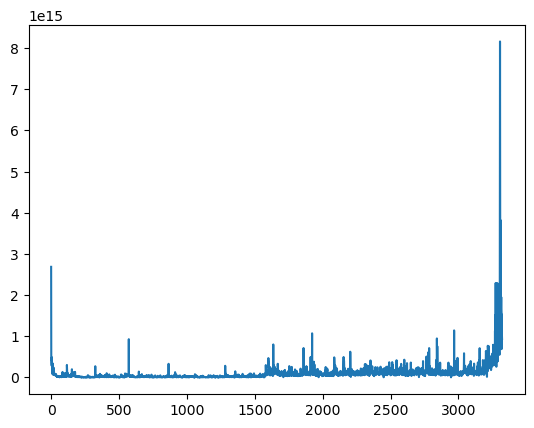

In [5]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [25]:
df2[1228:]

array([[5.34572555e-04],
       [1.05932286e-03],
       [5.05105285e-05],
       ...,
       [1.02646119e-01],
       [1.27794318e-01],
       [1.14750474e-01]])

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [8]:
training_dataset_size=int(len(df2)*0.65)
test_dataset_size=len(df2)-training_dataset_sizefrom sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
train_data=df2[0:training_dataset_size,:]
test_data=df2[training_dataset_size:len(df2),:1]

In [9]:
import numpy
def create_dataset(dataset,time_step=1):
    data_X=[]
    data_Y=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        data_X.append(a)
        data_Y.append(dataset[i+time_step,0])
    return numpy.array(data_X),numpy.array(data_Y)

In [10]:
time_step=100
X_train_data, Y_train_data=create_dataset(train_data,time_step)
X_test_data, Y_test_data=create_dataset(test_data,time_step)

In [11]:
print(X_train_data)

[[0.32931759 0.05281808 0.05573317 ... 0.002002   0.00462989 0.00292418]
 [0.05281808 0.05573317 0.05245648 ... 0.00462989 0.00292418 0.0020556 ]
 [0.05573317 0.05245648 0.03520246 ... 0.00292418 0.0020556  0.01293864]
 ...
 [0.00600363 0.01557579 0.01347118 ... 0.00920749 0.02177808 0.06090154]
 [0.01557579 0.01347118 0.00955804 ... 0.02177808 0.06090154 0.01458839]
 [0.01347118 0.00955804 0.00920724 ... 0.06090154 0.01458839 0.02535791]]


In [12]:
X_train_data=X_train_data.reshape(X_train_data.shape[0],X_train_data.shape[1],1)
X_test_data=X_test_data.reshape(X_test_data.shape[0],X_test_data.shape[1],1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(X_train_data,Y_train_data,validation_data=(X_test_data,Y_test_data),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
33/33 [==============================] - 43s 568ms/step - loss: 7.5794e-05 - val_loss: 0.0026
Epoch 2/100
33/33 [==============================] - 14s 411ms/step - loss: 5.1655e-05 - val_loss: 0.0016
Epoch 3/100
33/33 [==============================] - 14s 416ms/step - loss: 4.7161e-05 - val_loss: 0.0016
Epoch 4/100
33/33 [==============================] - 14s 416ms/step - loss: 5.1506e-05 - val_loss: 0.0016
Epoch 5/100
33/33 [==============================] - 13s 393ms/step - loss: 4.8429e-05 - val_loss: 0.0016
Epoch 6/100
33/33 [==============================] - 13s 402ms/step - loss: 4.9514e-05 - val_loss: 0.0016
Epoch 7/100
33/33 [==============================] - 12s 352ms/step - loss: 4.8844e-05 - val_loss: 0.0016
Epoch 8/100
33/33 [==============================] - 8s 245ms/step - loss: 4.6868e-05 - val_loss: 0.0015
Epoch 9/100
33/33 [==============================] - 10s 296ms/step - loss: 4.9550e-05 - val_loss: 0.0017
Epoch 10/100
33/33 [===========================

In [26]:
import tensorflow as tf

In [29]:
train_predict_data=model.predict(X_train_data)
test_predict_data=model.predict(X_test_data)

34/34 [==============================] - 2s 67ms/step


In [30]:
train_predict_data=scaler.inverse_transform(train_predict_data)
test_predict_data=scaler.inverse_transform(test_predict_data)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train_data,train_predict_data))

63963533086942.734

<function matplotlib.pyplot.show(close=None, block=None)>

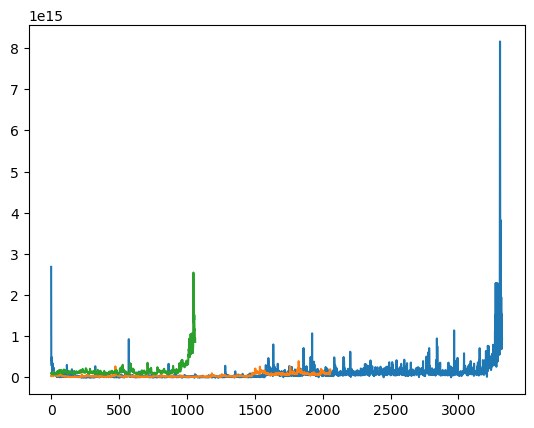

In [32]:
look_back=100
train_predicted_plots=numpy.empty_like(df2)
train_predicted_plots[:, :]=np.nan
train_predicted_plots[look_back:len(train_predict_data)+look_back,:]=train_predict_data
test_predicted_plots=numpy.empty_like(df2)
test_predicted_plots[:, :]=numpy.nan
test_predicted_plots[len(train_predict_data)+(look_back*2)+1:len(df2)-1,:]=test_predict_data
plt.plot(scaler.inverse_transform(df2))
plt.plot(train_predict_data)
plt.plot(test_predict_data)
plt.show

In [33]:
len(test_data)

1163

In [34]:
len(train_data)

2159

In [35]:
input_x=test_data[1063:].reshape(1,-1)
input_x.shape

(1, 100)

In [36]:
new_input=list(input_x)
new_input=new_input[0].tolist()

In [37]:
new_input

[0.058247240783247,
 0.05618381210712643,
 0.09276893243813379,
 0.0523280641208947,
 0.03307834179903859,
 0.027287865778399843,
 0.028196926877537068,
 0.034020903254737375,
 0.06375575191043303,
 0.03179368891898159,
 0.038956875718601125,
 0.034011863929353105,
 0.04604864812014608,
 0.052658910597563106,
 0.045866974466314915,
 0.04470450544258275,
 0.04994236198750972,
 0.03480131484289873,
 0.022086442504853993,
 0.026103533763929803,
 0.04743216154905606,
 0.06139797070055645,
 0.03138045112471761,
 0.03179631878187659,
 0.06459667450595856,
 0.046410375133066964,
 0.04461853015761313,
 0.04252502627595598,
 0.07132353004677992,
 0.039857270881592056,
 0.03530219103280861,
 0.039680842484899434,
 0.043273547496867695,
 0.09732160006341978,
 0.05995640861064399,
 0.045713867651149126,
 0.03788656526572136,
 0.0572005997562883,
 0.03627599279637146,
 0.04320022310936068,
 0.06556800795679393,
 0.0480255541177616,
 0.05078086122942885,
 0.04744828274659835,
 0.0389035646314159,
 0

In [38]:
from numpy import array
first_output=[]
i=0
n_steps=100
while(i<30):
    if(len(new_input)>100):
        input_x=np.array(new_input[1:])
        print("{}day input{}".format(i,input_x))
        input_x=input_x.reshape(1,-1)
        input_x=input_x.reshape(1,n_steps,1)
        yhat=model.predict(input_x,verbose=0)
        print("{} day output {}".format(i,yhat))
        new_input.extend(yhat[0].tolist())
        new_input=new_input[1:]
        first_output.extend(yhat.tolist())
        i=i+1
    else:
        input_x=input_x.reshape(1,n_steps,1)
        yhat=model.predict(input_x,verbose=0)
        print(yhat[0])
        new_input.extend(yhat[0].tolist())
        print(len(new_input))
        first_output.extend(yhat.tolist())
        i=i+1
print(first_output)

[0.10105115]
101
1day input[0.05618381 0.09276893 0.05232806 0.03307834 0.02728787 0.02819693
 0.0340209  0.06375575 0.03179369 0.03895688 0.03401186 0.04604865
 0.05265891 0.04586697 0.04470451 0.04994236 0.03480131 0.02208644
 0.02610353 0.04743216 0.06139797 0.03138045 0.03179632 0.06459667
 0.04641038 0.04461853 0.04252503 0.07132353 0.03985727 0.03530219
 0.03968084 0.04327355 0.0973216  0.05995641 0.04571387 0.03788657
 0.0572006  0.03627599 0.04320022 0.06556801 0.04802555 0.05078086
 0.04744828 0.03890356 0.06352014 0.07781963 0.1388951  0.07604568
 0.18542741 0.1164605  0.11807387 0.28119698 0.10660147 0.14168564
 0.13650809 0.09213036 0.03190864 0.15837773 0.1674197  0.09784651
 0.09973037 0.18086872 0.2810787  0.16195301 0.14131063 0.07861554
 0.04795115 0.09899671 0.11730424 0.13289355 0.06997023 0.09254671
 0.08599672 0.19943538 0.27880415 0.18890059 0.14358388 0.10632719
 0.07907032 0.06743768 0.13350693 0.13974795 0.63308444 1.
 0.34313608 0.2209822  0.2625211  0.4684362

In [39]:
new_data_daywise=np.arange(1,101)
day=np.arange(101,131)


In [40]:
import matplotlib.pyplot as plt


In [41]:
len(df2)

3322

In [42]:
df4=df2.tolist()
df4.extend(first_output)

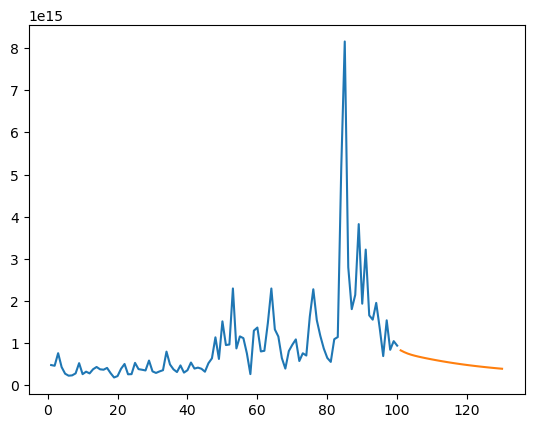

In [43]:
plt.plot(new_data_daywise,scaler.inverse_transform(df2[3222:]))
plt.plot(day,scaler.inverse_transform(first_output))